# Fraud Detection

In [2]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings("ignore") # disabling warnings

In [3]:
path_tr = 'cs-training.csv'
path_ts = 'cs-test.csv'
data_train = pd.read_csv(path_tr) 
data_test_ = pd.read_csv(path_ts) 

In [4]:
data_train.shape, data_test_.shape, 

((150000, 12), (101503, 12))

In [5]:
df_test_ = pd.DataFrame(data_test_)

In [6]:
df_train = pd.DataFrame(data_train)
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
df_train.describe(include='all')

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Train

In [8]:
df_train.count(axis=0)

Unnamed: 0                              150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
dtype: int64

In [9]:
df_train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### Test

In [10]:
df_test_.count(axis=0)

Unnamed: 0                              101503
SeriousDlqin2yrs                             0
RevolvingUtilizationOfUnsecuredLines    101503
age                                     101503
NumberOfTime30-59DaysPastDueNotWorse    101503
DebtRatio                               101503
MonthlyIncome                            81400
NumberOfOpenCreditLinesAndLoans         101503
NumberOfTimes90DaysLate                 101503
NumberRealEstateLoansOrLines            101503
NumberOfTime60-89DaysPastDueNotWorse    101503
NumberOfDependents                       98877
dtype: int64

In [11]:
df_test_.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [12]:
df_test_.head(2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0


### View all features

In [14]:
categorical_columns = [c for c in df_train.columns if df_train[c].dtype.name == 'object']
numerical_columns   = [c for c in df_train.columns if df_train[c].dtype.name != 'object']
print('categorical_columns:', categorical_columns)
print( 'numerical_columns:', numerical_columns)

categorical_columns: []
numerical_columns: ['Unnamed: 0', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [15]:
#ОLet's define a complete list of values of categorical features
colum = df_train[categorical_columns].columns
for i, j in zip(colum, categorical_columns):
    print(i, df_train[j].unique()) 

### Data Preparation

#### Replacing NAN with mean

In [19]:
mean_MonthlyIncome = df_train['MonthlyIncome'].mean()
df_train['MonthlyIncome'].fillna(mean_MonthlyIncome, inplace =True)

mean_NumberOfDependents = df_train['NumberOfDependents'].mean()
df_train['NumberOfDependents'].fillna(mean_NumberOfDependents, inplace =True)

In [20]:
mean_MonthlyIncome = df_test_['MonthlyIncome'].mean()
df_test_['MonthlyIncome'].fillna(mean_MonthlyIncome, inplace =True)

mean_NumberOfDependents = df_test_['NumberOfDependents'].mean()
df_test_['NumberOfDependents'].fillna(mean_NumberOfDependents, inplace =True)

In [21]:
df_train.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [22]:
df_test_.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

### Data Analysis

In [23]:
#scatter_matrix(df_train, alpha=0.05, figsize=(10, 10));

In [24]:
df_train.corr()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,1.000000,0.002801,0.002372,0.004403,-0.000571,-0.002906,0.002356,0.004586,-0.001104,-0.000666,-0.000777,-0.000055
SeriousDlqin2yrs,0.002801,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.018002,-0.029669,0.117175,-0.007038,0.102261,0.045621
RevolvingUtilizationOfUnsecuredLines,0.002372,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006565,-0.011281,-0.001061,0.006235,-0.001048,0.001539
age,0.004403,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.032984,0.147705,-0.061005,0.033150,-0.057159,-0.208102
NumberOfTime30-59DaysPastDueNotWorse,-0.000571,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.007636,-0.055312,0.983603,-0.030565,0.987005,-0.002525
DebtRatio,-0.002906,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.005355,0.049565,-0.008320,0.120046,-0.007533,-0.038287
MonthlyIncome,0.002356,-0.018002,0.006565,0.032984,-0.007636,-0.005355,1.000000,0.082319,-0.009484,0.113823,-0.008259,0.058542
NumberOfOpenCreditLinesAndLoans,0.004586,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.082319,1.000000,-0.079984,0.433959,-0.071077,0.064507
NumberOfTimes90DaysLate,-0.001104,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.009484,-0.079984,1.000000,-0.045205,0.992796,-0.009579
NumberRealEstateLoansOrLines,-0.000666,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.113823,0.433959,-0.045205,1.000000,-0.039722,0.123370


#### Analysis of the target function "SeriousDlqin2yrs" for the need for balancing

In [25]:
type=df_train['SeriousDlqin2yrs'].groupby(df_train['SeriousDlqin2yrs']).count()
type

SeriousDlqin2yrs
0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

<AxesSubplot:xlabel='SeriousDlqin2yrs'>

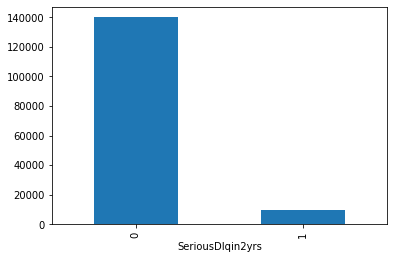

In [26]:
type.plot(kind='bar')

### Data Balancing

In [27]:
df_train_0 = df_train[df_train['SeriousDlqin2yrs']==0]
df_train_0 = pd.concat([df_train_0]*1)

df_train_1 = df_train[df_train['SeriousDlqin2yrs']==1]
df_train_1 = pd.concat([df_train_1]*12)

df_train_balanced = pd.concat([df_train_0, df_train_1])
type=df_train_balanced['SeriousDlqin2yrs'].groupby(df_train_balanced['SeriousDlqin2yrs']).count()
type

SeriousDlqin2yrs
0    139974
1    120312
Name: SeriousDlqin2yrs, dtype: int64

In [28]:
type=df_train_balanced['SeriousDlqin2yrs'].groupby(df_train_balanced['SeriousDlqin2yrs']).count()
type

SeriousDlqin2yrs
0    139974
1    120312
Name: SeriousDlqin2yrs, dtype: int64

<AxesSubplot:xlabel='SeriousDlqin2yrs'>

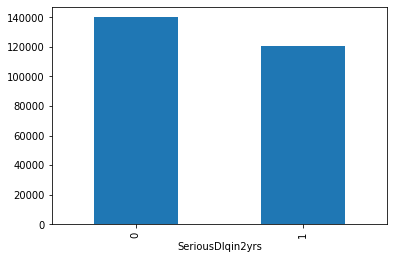

In [29]:
type.plot(kind='bar')

#### Data Shuffle

In [30]:
from sklearn.utils import shuffle
df_train_balanced = shuffle(df_train_balanced, random_state=42)
df_train_balanced.shape

(260286, 12)

#### Data Scaling

In [31]:
temp = df_train_balanced.loc[:,numerical_columns[2:]]
df_train_scaler = (temp - temp.mean()) / temp.std()
df_train_scaler.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,2.602860e+05,2.602860e+05,2.602860e+05,2.602860e+05,2.602860e+05,2.602860e+05,2.602860e+05,2.602860e+05,2.602860e+05,2.602860e+05
mean,1.965495e-18,1.147631e-16,1.485040e-17,-2.773531e-17,1.543732e-16,-3.658004e-17,3.090195e-17,-1.318519e-17,5.732693e-18,-1.403691e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.564021e-02,-3.452759e+00,-1.505920e-01,-1.882816e-01,-6.028813e-01,-1.527869e+00,-1.247230e-01,-7.957918e-01,-1.098530e-01,-7.267767e-01
25%,-2.532407e-02,-7.377105e-01,-1.505920e-01,-1.881769e-01,-2.662006e-01,-7.835702e-01,-1.247230e-01,-7.957918e-01,-1.098530e-01,-7.267767e-01
50%,-2.368617e-02,-4.154408e-02,-1.505920e-01,-1.880579e-01,-2.899385e-02,-2.253462e-01,-1.247230e-01,-4.472124e-03,-1.098530e-01,-7.267767e-01
75%,-2.119836e-02,6.546223e-01,-3.056644e-02,-1.877758e-01,5.708926e-02,5.189525e-01,-1.247230e-01,7.868475e-01,-1.098530e-01,1.418460e-01
max,2.436280e+02,4.135454e+00,1.161191e+01,1.887725e+02,2.871777e+02,9.264462e+00,1.163469e+01,4.193547e+01,1.168037e+01,1.664568e+01


In [32]:
df_train_scaler.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
50097,-0.023567,0.445772,-0.150592,-0.187876,0.114478,1.635401,-0.124723,-0.004472,-0.109853,1.010469
82423,-0.020835,-1.921193,11.611915,-0.188282,0.035111,-1.527869,11.634691,-0.795792,11.680366,-0.069036
96867,-0.021780,-0.389627,-0.030566,-0.187945,-0.072035,-0.225346,-0.124723,-0.004472,0.010455,-0.726777
19824,-0.025419,2.186188,-0.150592,-0.188202,-0.568448,-1.155720,-0.124723,-0.795792,-0.109853,-0.726777
22741,-0.025461,1.002705,-0.150592,-0.188079,0.481096,0.891102,-0.124723,0.786848,-0.109853,-0.726777


### Target selection

In [33]:
#TRAIN
y_tr = pd.DataFrame(df_train_balanced['SeriousDlqin2yrs'])
y_tr['SeriousDlqin2yrs'].value_counts()

0    139974
1    120312
Name: SeriousDlqin2yrs, dtype: int64

In [34]:
#TRAIN
X_tr = df_train_scaler
X_tr.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
50097,-0.023567,0.445772,-0.150592,-0.187876,0.114478,1.635401,-0.124723,-0.004472,-0.109853,1.010469
82423,-0.020835,-1.921193,11.611915,-0.188282,0.035111,-1.527869,11.634691,-0.795792,11.680366,-0.069036
96867,-0.021780,-0.389627,-0.030566,-0.187945,-0.072035,-0.225346,-0.124723,-0.004472,0.010455,-0.726777
19824,-0.025419,2.186188,-0.150592,-0.188202,-0.568448,-1.155720,-0.124723,-0.795792,-0.109853,-0.726777
22741,-0.025461,1.002705,-0.150592,-0.188079,0.481096,0.891102,-0.124723,0.786848,-0.109853,-0.726777


In [35]:
#TEST
X_test_ = df_test_.loc[:,numerical_columns[2:]]
X_test_.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


#### Training and Test Sets

In [36]:
X = X_tr
y = y_tr

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((208228, 10), (52058, 10), (208228, 1), (52058, 1))

#### Sample for prediction

In [38]:
X_test_.shape

(101503, 10)

# Model Training

### KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform' )
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_test_)

print('Accuracy train is: ', knn.score(X_train, y_train))
print('Accuracy test is: ', knn.score(X_test, y_test))
scores = cross_val_score(knn, X, y, cv=5)
print('Cross_Val_Score:', scores) 

print('Predict for X-test is y_train_predict:')

Accuracy train is:  0.9476007069174175
Accuracy test is:  0.9257750970071843
Cross_Val_Score: [0.92627454 0.92513975 0.92537027 0.92634996 0.92700309]
Predict for X-test is y_train_predict:


In [40]:
y_train_predict[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [41]:
y_train_predict.shape

(101503,)

In [44]:
a, cnts = np.unique(y_train_predict, return_counts=True)
high_freq, high_freq_element = cnts.max(), y_train_predict[cnts.argmax()]
high_freq, high_freq_element

(101431, 0)

In [47]:
print('Number of decisions - "0":', cnts[0], '   Number of decisions - "1":', cnts[1],)

Number of decisions - "0": 101431    Number of decisions - "1": 72


### DecisionTreeClassifier

In [48]:
model_dtree = DecisionTreeClassifier(max_depth=35, random_state=42)
model_dtree.fit(X_train, y_train)
y_train_predict = model_dtree.predict(X_test_)

print('Accuracy train is: ', model_dtree.score(X_train, y_train))
print('Accuracy test is: ', model_dtree.score(X_test, y_test))
scores = cross_val_score(model_dtree, X, y, cv=5)
print('Cross_Val_Score:', scores) 

print('Predict for X-test is y_train_predict:')

Accuracy train is:  0.9983719768715063
Accuracy test is:  0.9650582043105767
Cross_Val_Score: [0.96428983 0.96532647 0.96524963 0.9675548  0.96567224]
Predict for X-test is y_train_predict:


In [49]:
y_train_predict[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [50]:
y_train_predict.shape

(101503,)

In [51]:
a, cnts = np.unique(y_train_predict, return_counts=True)
high_freq, high_freq_element = cnts.max(), y_train_predict[cnts.argmax()]
high_freq, high_freq_element

(78172, 0)

In [52]:
print('Number of decisions - "0":', cnts[0], '   Number of decisions - "1":', cnts[1],)

Number of decisions - "0": 78172    Number of decisions - "1": 23331


#### Visualizing the Importance of Parameters

In [53]:
#importances = model_rf_grid_best.feature_importances_
importances = model_dtree.feature_importances_
print(importances)
#std = np.std([tree.feature_importances_ for tree in model_rf_grid_best.estimators_], axis=0)

[0.34516683 0.09673133 0.07558926 0.15164486 0.11848646 0.0672045
 0.06477515 0.02734139 0.02408739 0.02897283]


In [54]:
indices = np.argsort(importances)[::-1]
names_indices = ['x_coor', 'y_coor']

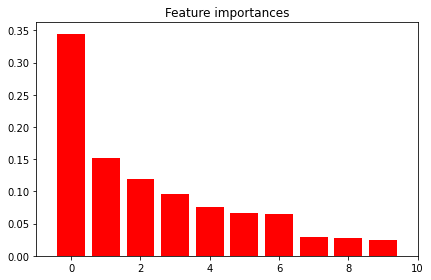

In [60]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
 
plt.bar(range(len(importances)), importances[indices], color="r")
#plt.xticks(range(len(importances)), names_indices, rotation=90)
 
plt.tight_layout()
plt.xlim([-1, len(importances)])
plt.show()

#### Highlight important features

In [61]:
feature_names = X.columns
print(feature_names)
print(X.shape)
print(y.shape)
N, d = X.shape

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
(260286, 10)
(260286, 1)


In [62]:
#Let's order the significances and display their values:importances = rf.feature_importances_
importances = model_dtree.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.5f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'RevolvingUtilizationOfUnsecuredLines' (0.34517)
 2. feature 'DebtRatio' (0.15164)
 3. feature 'MonthlyIncome' (0.11849)
 4. feature 'age  ' (0.09673)
 5. feature 'NumberOfTime30-59DaysPastDueNotWorse' (0.07559)
 6. feature 'NumberOfOpenCreditLinesAndLoans' (0.06720)
 7. feature 'NumberOfTimes90DaysLate' (0.06478)
 8. feature 'NumberOfDependents' (0.02897)
 9. feature 'NumberRealEstateLoansOrLines' (0.02734)
10. feature 'NumberOfTime60-89DaysPastDueNotWorse' (0.02409)


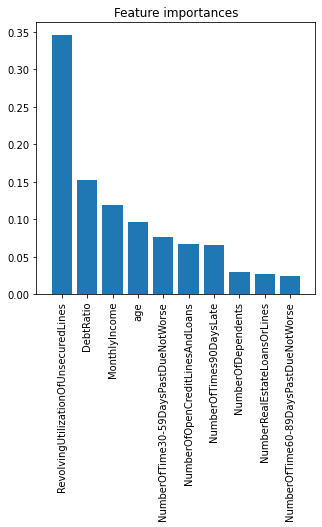

In [63]:
d_first = 10
plt.figure(figsize=(5, 5))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [64]:
best_features = indices[:5]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'age', 'NumberOfTime30-59DaysPastDueNotWorse'],
      dtype='object')


In [65]:
best_features_names

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'age', 'NumberOfTime30-59DaysPastDueNotWorse'],
      dtype='object')

#### Dcision with Best_Featuree

In [66]:
model_dtree.fit(X_train[best_features_names], y_train)
print('Accuracy train is: ', model_dtree.score(X_train[best_features_names], y_train))
print('Accuracy test is: ', model_dtree.score(X_test[best_features_names], y_test))

scores = cross_val_score(model_dtree, X, y, cv=5)
print('Cross_Val_Score:', scores) 

Accuracy train is:  0.9928347772633843
Accuracy test is:  0.9596411694648277
Cross_Val_Score: [0.96428983 0.96532647 0.96524963 0.9675548  0.96567224]


In [67]:
knn = KNeighborsClassifier(n_neighbors=12, weights='distance' )
knn.fit(X_train[best_features_names], y_train)
print('Accuracy train is: ', knn.score(X_train[best_features_names], y_train))
print('Accuracy test is: ', knn.score(X_test[best_features_names], y_test))

Accuracy train is:  0.9985160497147357
Accuracy test is:  0.8907564639440624
